In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# constants:
A = 0.84
kappa = 1.7e1
H = 12
L = 1.9e4
r = 0.24
h0 = 0.0025
# h0 = 0.00025
omega = 1.4e-4


# n_x = 100
dx = 0.002
n_x = int(1 / dx)

dt = 4.e-4
n_timesteps = 50000

x_x = np.linspace(-dx, 1 + dx, n_x + 2)
h_x = np.linspace(-dx, 1 + dx, n_x + 2)
dx = x_x[1] - x_x[0]

u_xt_ = np.zeros((n_x + 2, n_timesteps + 1))
D_xt_ = np.zeros((n_x + 2, n_timesteps + 1))
l_t_ = np.zeros(n_timesteps + 1)

D_xt_[0, :] = 1 + A / H
l_t_[0] = 1


def update_l(l__t, u_x_t, dt):
    return l__t + u_x_t[-2] * dt

def update_D(l__t1, l__t2, u_x_t, x_x, D_x_t, dt, dx, t):
    D_x_t2 = np.zeros(n_x + 2)
    D_x_t2[0] = A / H * np.cos(t) + 1
    # D_x_t2[-1] = 0 # redundant
    D_x_t2[1:-1] = (D_x_t[2:] + D_x_t[:-2]) / 2 + \
        x_x[1:-1] * (l__t2 - l__t1) / l__t1 * (D_x_t[2:] - D_x_t[:-2]) / (2 * dx) - \
        dt / (2 * dx * l__t1) * (D_x_t[2:] * u_x_t[2:] - D_x_t[:-2] * u_x_t[:-2])

    
    return D_x_t2


def update_u(l__t1, l__t2, u_x_t, x_x, h_x, D_x_t, D_x_t2, dt, dx):
    Lambda = r / (D_x_t2 + h0)


    u_x_t2 = np.zeros(n_x + 2)

    u_x_t2[0] = (u_x_t[0] - dt / (2 * dx * l__t1) * u_x_t[0] * \
        (
            (-3*u_x_t[0] + 4 * u_x_t[1] - u_x_t[2]) + \
            kappa * (-3 * D_x_t[0] + 4 * D_x_t[1] - D_x_t[2] - 3 * h_x[0] + 4 * h_x[1] - h_x[2])
        )) / (1 + Lambda[0] * dt)

    u_x_t2[-1] = (u_x_t[-1] - dt / (2 * dx * l__t1) * u_x_t[-1] * \
        (
            (3*u_x_t[-1] - 4 * u_x_t[-2] + u_x_t[-3]) + \
            kappa * (3 * D_x_t[-1] - 4 * D_x_t[-2] + D_x_t[-3] + 3 * h_x[-1] - 4 * h_x[-2] + h_x[-3])
        )) / (1 + Lambda[-1] * dt)

    u_x_t2[1:-1] = ((u_x_t[2:] + u_x_t[:-2]) / 2 + dt / (2 * l__t1 * dx) * \
        ((x_x[1:-1] * (l__t2 - l__t1) / dt - u_x_t[1:-1]) * (u_x_t[2:] - u_x_t[:-2]) - \
         kappa * (D_x_t[2:] - D_x_t[:-2] + h_x[2:] - h_x[:-2]))) / (1 + Lambda[1:-1] * dt)
    
    return u_x_t2


for timestep in range(n_timesteps):
    l_t_[timestep + 1] = update_l(l_t_[timestep], u_xt_[:, timestep], dt)
    D_xt_[:, timestep + 1] = update_D(l_t_[timestep], l_t_[timestep + 1], u_xt_[:, timestep], x_x, D_xt_[:, timestep], dt, dx, timestep * dt)
    u_xt_[:, timestep + 1] = update_u(l_t_[timestep], l_t_[timestep + 1], u_xt_[:, timestep], x_x, x_x * l_t_[timestep], D_xt_[:, timestep], D_xt_[:, timestep + 1], dt, dx)
    



1.07
1.0699999944
1.069999977600001
1.069999949600006
1.069999910400019
1.0699998600000467
1.0699997984000968
1.0699997256001792
1.069999641600306
1.0699995464004899
1.0699994400007466
1.069999322401093
1.0699991936015483
1.0699990536021327
1.0699989024028684
1.06999874000378
1.0699985664048934
1.0699983816062362
1.0699981856078382
1.0699979784097307
1.0699977600119466
1.0699975304145213
1.069997289617491
1.0699970376208947
1.0699967744247725
1.0699965000291665
1.0699962144341209
1.0699959176396807
1.069995609645894
1.06999529045281
1.0699949600604797
1.069994618468956
1.0699942656782933
1.0699939016885482
1.069993526499779
1.069993140112046
1.0699927425254105
1.0699923337399364
1.069991913755689
1.0699914825727355
1.069991040191145
1.0699905866109882
1.0699901218323378
1.069989645855268
1.069989158679855
1.0699886603061768
1.069988150734313
1.0699876299643452
1.0699870979963568
1.069986554830433
1.0699860004666604
1.069985434905128
1.0699848581459261
1.069984270189147
1.06998367103488

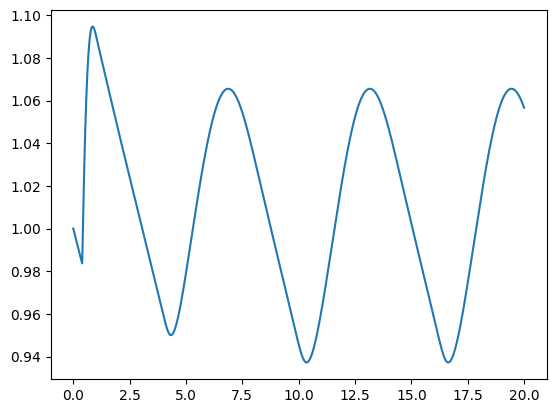

In [157]:
time = np.linspace(0, dt * n_timesteps, n_timesteps + 1)

plt.plot(time, l_t_)
plt.show()

(50001, 502) (50001, 502)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (50001, 500) and arg 1 with shape (50001, 502).

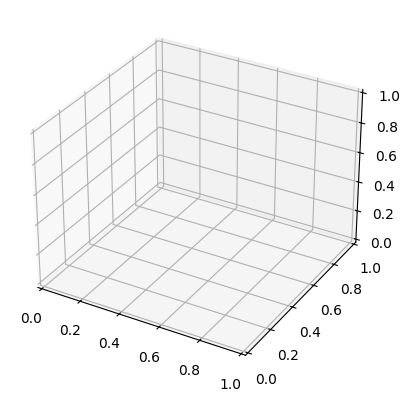

In [ ]:

x, t = np.meshgrid(x_x[1:-1], time)


print(x.shape, t.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, t, u_xt_[1:-1, :].T, vmin=u_xt_.min() * 2, cmap=cm.Blues)

plt.show()


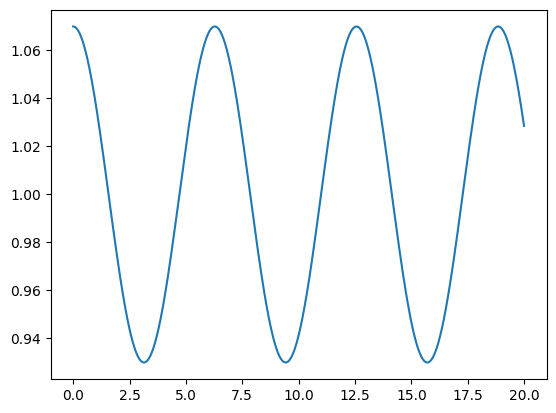

(50001,)
(50001,)


In [152]:
plt.plot(time, D_xt_[0, :])
plt.show()

print(time.shape)
print(D_xt_[0, :].shape)